# 第十三讲 信息压缩 

-- 第一部分  连续变量压缩
- AvgIncome	当地人均收入
- ID	员工ID
- gender	性别
- Dept	部门
- performance	绩效总分
- adaptation	适应总分
- emotion	情绪总分

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis,FastICA
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

帮助文档
http://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca

In [2]:
model_data = pd.read_csv("staff_performances.csv")
model_data.head()


,ID,gender,Dept,performance,adaptation,emotion
0,1,1,1,12,11,12
1,2,1,3,13,10,12
2,3,1,1,20,10,14
3,4,2,2,8,12,8
4,5,2,3,11,12,12


In [3]:
data = model_data.ix[ :,'performance':]
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,performance,adaptation,emotion
0,12,11,12
1,13,10,12
2,20,10,14
3,8,12,8
4,11,12,12


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
performance,100.0,11.89,5.041034,6.0,8.0,11.0,15.0,31.0
adaptation,100.0,9.93,3.238827,1.0,8.0,10.0,12.0,22.0
emotion,100.0,11.54,4.200577,6.0,9.0,11.0,13.0,26.0


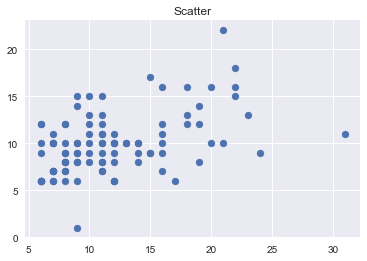

In [5]:
plt.scatter(model_data["performance"],model_data["adaptation"])
plt.title('Scatter')
plt.show()

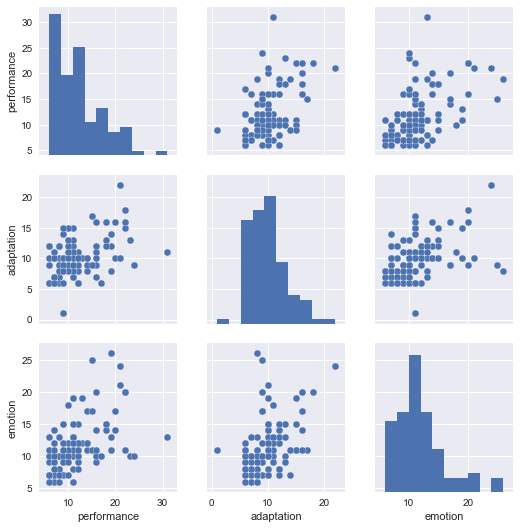

In [6]:
sns.pairplot(data);
plt.show()

计算相关系数矩阵

In [7]:
corr_matrix = data.corr(method='pearson')
#corr_matrix = corr_matrix.abs()
corr_matrix

,performance,adaptation,emotion
performance,1.000000,0.466618,0.537572
adaptation,0.466618,1.000000,0.411155
emotion,0.537572,0.411155,1.000000


主成分说明文档
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

初次查看主成分的解释方差占比

In [8]:
pca=PCA(n_components=3,whiten=True)
newData=pca.fit_transform(data)
pca.explained_variance_ratio_ 

array([ 0.68974409,  0.1775254 ,  0.13273051])

In [9]:
pca.components_ 

array([[ 0.76501757,  0.33655149,  0.54907305],
       [ 0.59486896, -0.04263573, -0.80269117],
       [ 0.24673678, -0.94069936,  0.23282112]])

In [10]:
pca=PCA(n_components=1,whiten=True)
newData=pca.fit_transform(data)
newData.T

array([[ 0.11523959,  0.18609742,  1.25331051, -0.69837698,  0.04438177,
        -0.19288217,  0.11049457,  0.02387025, -0.93677307, -1.19454853,
        -1.02701027, -0.5971183 , -0.25385066, -0.80969177,  2.95574721,
         0.34889066,  2.49641976,  0.38403654, -0.39138737,  0.31261264,
         0.33199201,  1.43661528, -0.46699021, -0.08213345, -0.68374263,
        -0.41494568, -1.01237591,  0.85856442, -1.06803331, -0.97666397,
        -1.04221069,  1.25805553, -0.49739106,  1.51221812, -0.1020789 ,
        -0.51733651, -1.19398246, -1.37615508,  1.33422445,  2.01544863,
         1.14730681,  0.84697686, -0.82963722,  0.73792637, -0.68374263,
        -0.97666397, -0.69837698, -0.26905109, -0.26848502,  1.563913  ,
        -0.91168331, -0.34465393, -0.55135024, -0.14310194, -1.28478573,
         0.21706435,  2.60983207,  0.28792217, -0.12202435, -0.43071219,
         0.82172032,  0.19084244, -0.16304739,  2.38510496,  1.85966471,
        -0.72306745, -0.00596453,  0.20547679,  0.3

将打分结果和原始数据联结

In [12]:
score=pd.DataFrame(newData)
data_new=model_data.join(score)
data_new.head()

,ID,gender,Dept,performance,adaptation,emotion,0
0,1,1,1,12,11,12,0.115240
1,2,1,3,13,10,12,0.186097
2,3,1,1,20,10,14,1.253311
3,4,2,2,8,12,8,-0.698377
4,5,2,3,11,12,12,0.044382


In [16]:
data_new.sort(0)

/home/quant/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ID,gender,Dept,performance,adaptation,emotion,0
76,77,1,2,6,6,6,-1.466958
75,76,1,1,6,6,7,-1.376155
37,38,1,1,6,6,7,-1.376155
54,55,1,3,7,7,6,-1.284786
9,10,2,2,6,6,9,-1.194549
36,37,2,2,7,7,7,-1.193982
90,91,2,3,7,6,8,-1.158837
86,87,1,1,6,10,7,-1.153525
77,78,1,2,8,8,6,-1.102613
28,29,2,2,7,6,9,-1.068033


数据标准化的方法
http://www.cnblogs.com/chaosimple/p/4153167.html

因子分析说明文当
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis

In [17]:
model_data = pd.read_csv("cities_10.csv")
model_data.head()
data = model_data.ix[ :,'X1':]
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
1,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
2,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
3,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
4,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7


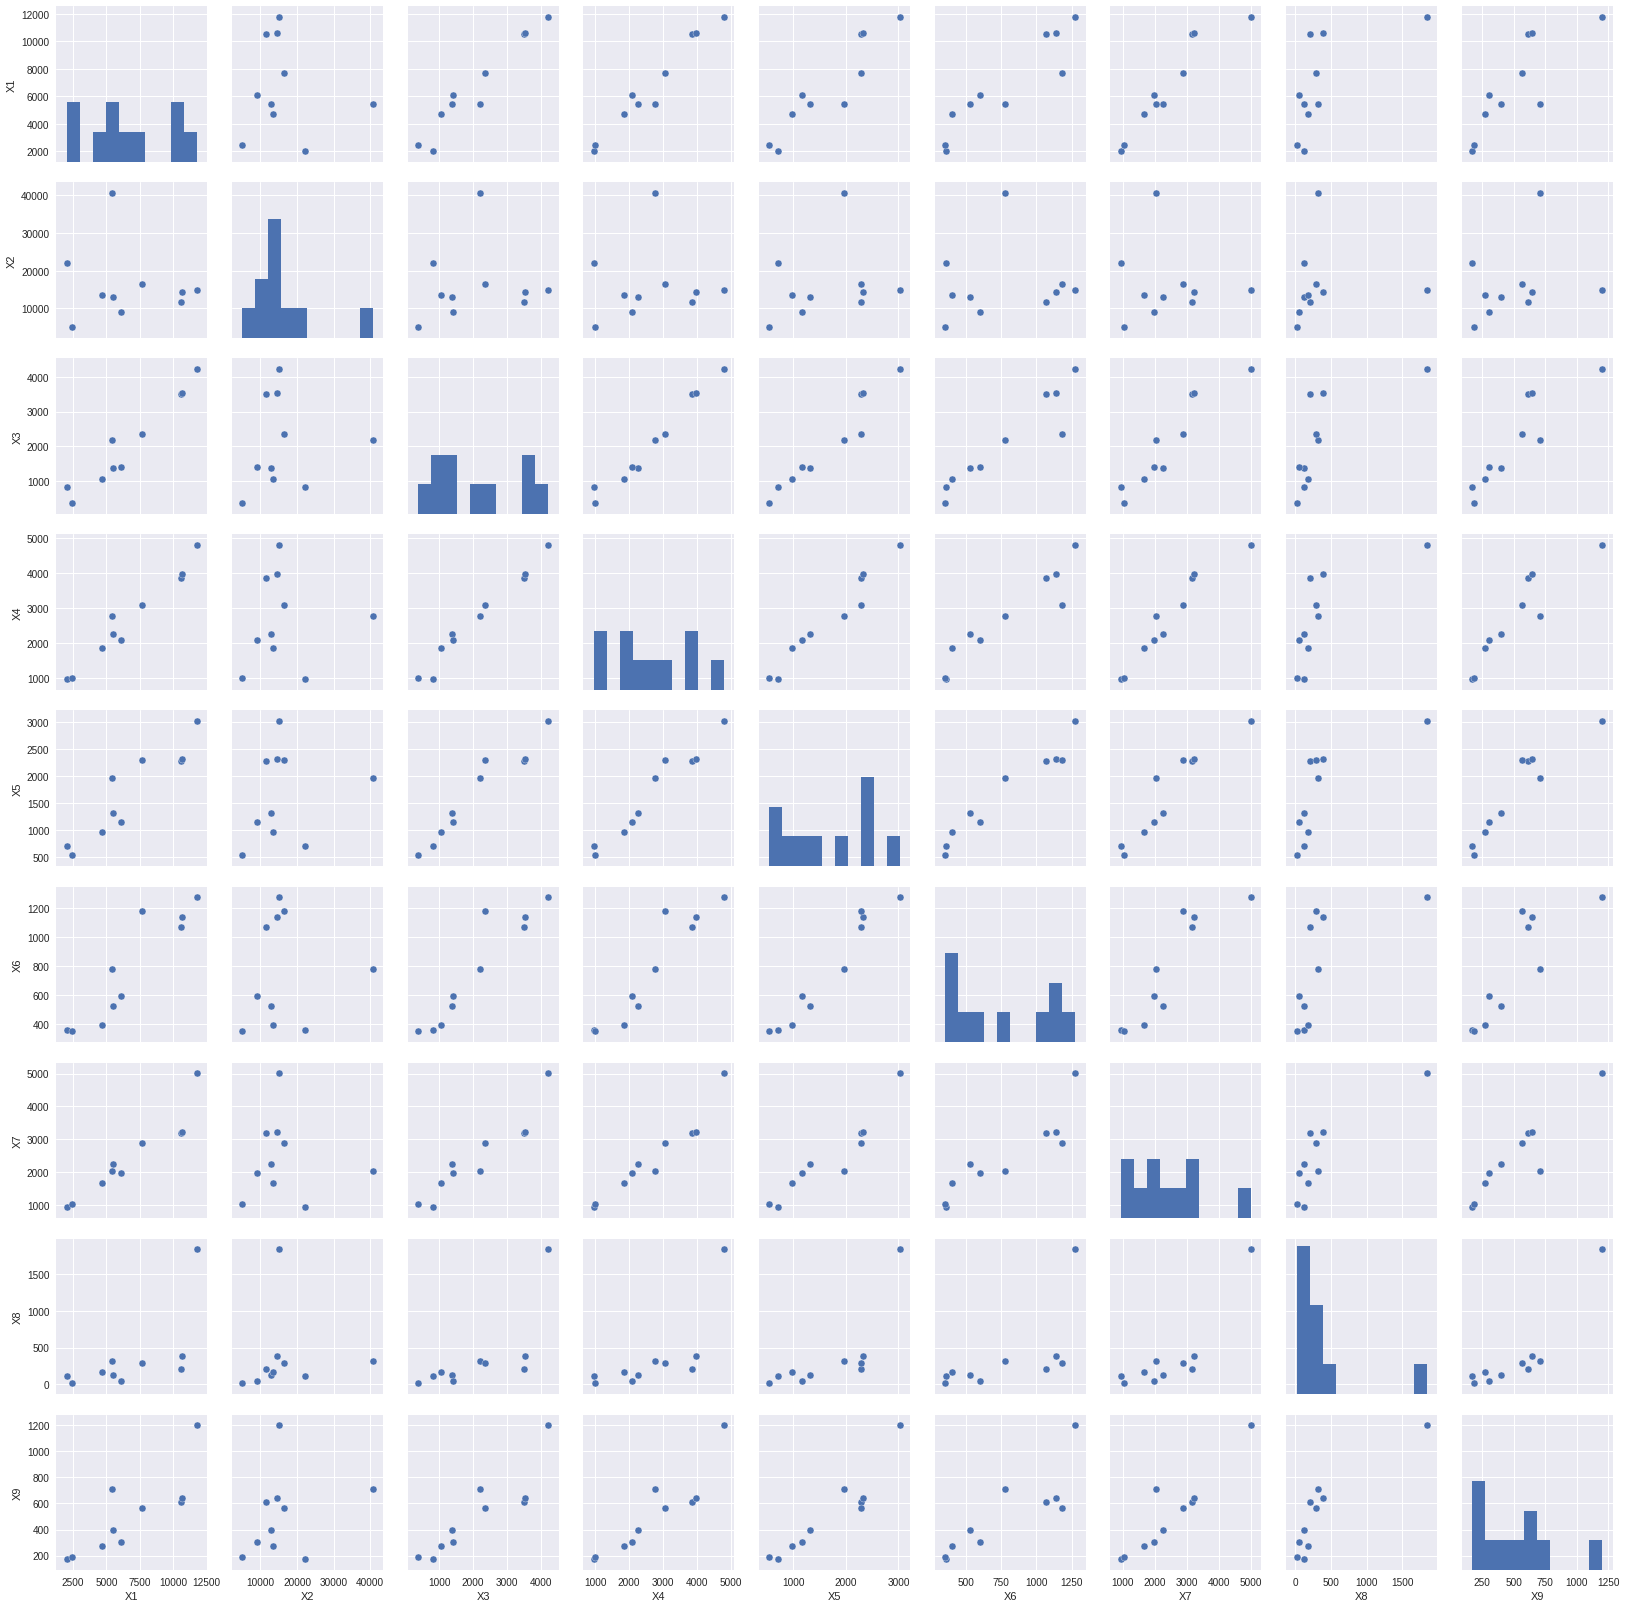

In [18]:
sns.pairplot(data);
plt.show()

In [14]:
corr_matrix = data.corr(method='pearson')
#corr_matrix = corr_matrix.abs()
corr_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,1.000000,-0.094292,0.966506,0.979238,0.922984,0.921680,0.941148,0.637458,0.825568
X2,-0.094292,1.000000,0.112726,0.074167,0.214052,0.093483,-0.042776,0.081195,0.273145
X3,0.966506,0.112726,1.000000,0.985373,0.963159,0.939194,0.935196,0.704714,0.898016
X4,0.979238,0.074167,0.985373,1.000000,0.972862,0.939720,0.962267,0.713890,0.913364
X5,0.922984,0.214052,0.963159,0.972862,1.000000,0.971337,0.937109,0.716722,0.934549
X6,0.921680,0.093483,0.939194,0.939720,0.971337,1.000000,0.897127,0.624294,0.848004
X7,0.941148,-0.042776,0.935196,0.962267,0.937109,0.897127,1.000000,0.836272,0.928692
X8,0.637458,0.081195,0.704714,0.713890,0.716722,0.624294,0.836272,1.000000,0.881528
X9,0.825568,0.273145,0.898016,0.913364,0.934549,0.848004,0.928692,0.881528,1.000000


In [15]:
pca=PCA(n_components=3,whiten=True)
newData=pca.fit(data)
pd.DataFrame(pca.components_).T

,0,1,2
0,0.035974,0.819543,-0.363481
1,-0.998991,0.019617,-0.017359
2,-0.014051,0.312044,0.017710
3,-0.008644,0.307537,0.086207
4,-0.017610,0.192776,0.136640
5,-0.003247,0.083893,-0.002414
6,0.006300,0.281591,0.589425
7,-0.004205,0.089816,0.671854
8,-0.008557,0.066733,0.205786


In [19]:
fa=FactorAnalysis(n_components=3)
newData=fa.fit(data)
pd.DataFrame(fa.components_).T

,0,1,2
0,-305.064362,3215.592004,-123.318605
1,9215.321278,0.640669,-0.094786
2,139.641290,1218.514768,30.867226
3,89.648149,1202.665981,79.295406
4,168.552391,750.808471,91.963238
5,32.624200,327.184534,7.100573
6,-49.277716,1096.019328,321.176990
7,41.360352,343.405152,344.301214
8,80.982004,258.385147,118.556189


In [20]:
model_data = pd.read_csv("profile_telecom.csv")
model_data.head()

,ID,cnt_call,cnt_msg,cnt_wei,cnt_web
0,1964627,46,90,36,31
1,3107769,53,2,0,2
2,3686296,28,24,5,8
3,3961002,9,2,0,4
4,4174839,145,2,0,1


In [21]:
data = model_data.ix[ :,'cnt_call':]
data.head()

,cnt_call,cnt_msg,cnt_wei,cnt_web
0,46,90,36,31
1,53,2,0,2
2,28,24,5,8
3,9,2,0,4
4,145,2,0,1


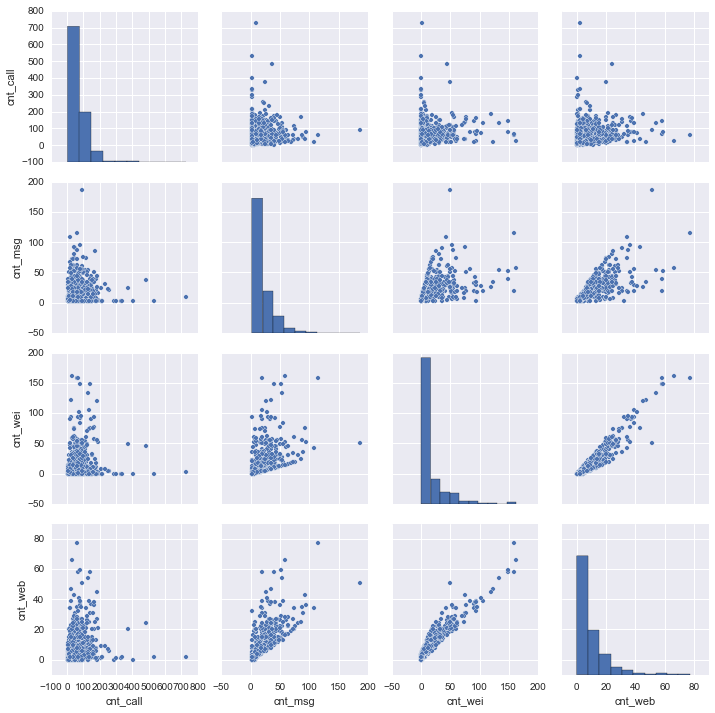

In [19]:
sns.pairplot(data);
plt.show()

In [20]:
corr_matrix = data.corr(method='pearson')
#corr_matrix = corr_matrix.abs()
corr_matrix

,cnt_call,cnt_msg,cnt_wei,cnt_web
cnt_call,1.000000,0.052096,0.117832,0.114190
cnt_msg,0.052096,1.000000,0.510686,0.739506
cnt_wei,0.117832,0.510686,1.000000,0.950492
cnt_web,0.114190,0.739506,0.950492,1.000000


In [24]:
pca=PCA(n_components=3,whiten=True)
newData=pca.fit(data)
pd.DataFrame(pca.components_).T

,0,1,2
0,0.998059,0.061208,0.011451
1,0.021107,-0.504442,0.845449
2,0.054020,-0.784785,-0.533563
3,0.022678,-0.354830,-0.019859


对数据进行标准化

http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

In [34]:
#data_scaled = (data - np.mean(data, 0)) / (np.std(data))#归一化，因为FactorAnalysis没有white选项
data_scaled = preprocessing.scale(data+0.0)#归一化，但是只能用于浮点类型变量
pd.DataFrame(data_scaled).head()

,0,1,2,3
0,-0.296453,3.680868,0.855139,2.081714
1,-0.190541,-0.802921,-0.597555,-0.647477
2,-0.568798,0.318026,-0.395792,-0.082817
3,-0.856274,-0.802921,-0.597555,-0.459257
4,1.201447,-0.802921,-0.597555,-0.741587


In [35]:
fa=FactorAnalysis(n_components=3)
newData=fa.fit(data_scaled)
pd.DataFrame(fa.components_).T

,0,1,2
0,0.115559,-0.033506,0.302478
1,0.691828,0.704892,-0.013046
2,0.970900,-0.228495,-0.006249
3,0.995883,0.071736,0.004656
